In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

<h4>Try to read in the data...</h4>

In [28]:
df = pd.read_csv('data/dylan_data/play_by_play_2010_11.csv', encoding='latin1')

In [37]:
df.head()

,xg,event_id,event_type,event,secondary_type,event_team,event_team_type,description,period,period_seconds,...,home_abbreviation,home_division_name,home_conference_name,home_id,away_name,away_abbreviation,away_division_name,away_conference_name,away_id,venue_id
0,NaN,2.010020e+13,GAME_SCHEDULED,Game Scheduled,NaN,NaN,NaN,Game Scheduled,1,0,...,TOR,Northeast,Eastern,10,Montréal Canadiens,MTL,Northeast,Eastern,8,5015.0
1,NaN,2.010020e+13,CHANGE,Change,NaN,Montréal Canadiens,away,"ON: Hal Gill, Scott Gomez, Brian Gionta, Josh ...",1,0,...,TOR,Northeast,Eastern,10,Montréal Canadiens,MTL,Northeast,Eastern,8,5015.0
2,NaN,2.010020e+13,CHANGE,Change,Line change,Toronto Maple Leafs,home,"ON: Jean-Sebastien Giguere, Francois Beauchemi...",1,0,...,TOR,Northeast,Eastern,10,Montréal Canadiens,MTL,Northeast,Eastern,8,5015.0
3,NaN,2.010020e+13,FACEOFF,Faceoff,NaN,Montréal Canadiens,away,Scott Gomez faceoff won against Tim Brent,1,0,...,TOR,Northeast,Eastern,10,Montréal Canadiens,MTL,Northeast,Eastern,8,5015.0
4,NaN,2.010020e+13,HIT,Hit,NaN,Toronto Maple Leafs,home,Tim Brent hit Josh Gorges,1,15,...,TOR,Northeast,Eastern,10,Montréal Canadiens,MTL,Northeast,Eastern,8,5015.0


In [36]:
# Group by game_id, and count the number of each event time.
# Then, unstack the result to make the event types into columns.

shot_stuff = df.groupby(['game_id', 'event_team', 'event_type']).size().unstack()
shot_stuff

event_type                      BLOCKED_SHOT  CHANGE  FACEOFF  GIVEAWAY  GOAL  \
game_id    event_team                                                           
2010020001 Montréal Canadiens           22.0   185.0     23.0       7.0   2.0   
           Toronto Maple Leafs          21.0   158.0     20.0      16.0   3.0   
2010020002 Philadelphia Flyers          14.0   147.0     22.0       9.0   3.0   
           Pittsburgh Penguins          16.0   144.0     34.0      11.0   2.0   
2010020003 Carolina Hurricanes          19.0   208.0     33.0      11.0   4.0   
...                                      ...     ...      ...       ...   ...   
2010030415 Vancouver Canucks            19.0   222.0     34.0      12.0   1.0   
2010030416 Boston Bruins                14.0   164.0     46.0       NaN   5.0   
           Vancouver Canucks            17.0   173.0     28.0       5.0   2.0   
2010030417 Boston Bruins                14.0   266.0     29.0       8.0   4.0   
           Vancouver Canucks            15.0   193.0     26.0      11.0   NaN   

event_type                       HIT  MISSED_SHOT  PENALTY  SHOT  TAKEAWAY  
game_id    event_team                                                       
2010020001 Montréal Canadiens   34.0         15.0      5.0  26.0       7.0  
           Toronto Maple Leafs  27.0          9.0      3.0  21.0       6.0  
2010020002 Philadelphia Flyers  34.0         10.0      6.0  24.0       1.0  
           Pittsburgh Penguins  32.0         18.0      5.0  29.0       9.0  
2010020003 Carolina Hurricanes  14.0          9.0      5.0  27.0       3.0  
...                              ...          ...      ...   ...       ...  
2010030415 Vancouver Canucks    47.0         12.0      5.0  24.0      15.0  
2010030416 Boston Bruins        43.0          5.0     10.0  35.0       5.0  
           Vancouver Canucks    38.0         15.0      9.0  36.0       5.0  
2010030417 Boston Bruins        29.0          8.0      2.0  17.0       8.0  
           Vancouver Canucks    47.0         10.0      1.0  37.0      12.0  

[2580 rows x 10 columns]

In [55]:
type(df.event_type.unique())

# Get the relevant unique event types
event_types = df.event_type.unique()
event_types = np.delete(event_types, )

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [145]:
# Get game 1 (and drop NaN's from event_team_type)
def get_data(df, game_id):
    
    game1 = df[df.game_id == game_id] 
    game1 = game1.dropna(subset=['event_team_type'])

    # Get unique event types (but drop CHANGE)
    event_types = game1.event_type.unique()
    event_types = np.delete(event_types, np.where(event_types == 'CHANGE'))
    # event_types = np.append(event_types, ['PERIOD', 'TIME_REMAINING', 'HOME', 'WIN'])
    event_types = np.append(event_types, ['TIME_REMAINING', 'HOME', 'WIN', 'TEAM', 'GAME_ID'])

    # Get home and away dictionaries with event types
    home_dict = {event: 0 for event in event_types}
    away_dict = {event: 0 for event in event_types}

    # Get home and away dataframes with event types to keep track of things
    home_df = pd.DataFrame(columns=home_dict.keys())
    away_df = pd.DataFrame(columns=away_dict.keys())

    # Iterate through the events in the game and count them.
    for index, row in game1.iterrows():
        # If the event_team_type is NaN, skip it
        if pd.isnull(row['event_team_type']):
            continue
        
        # If the event_type is CHANGE, skip it
        if row['event_type'] == 'CHANGE':
            continue
        
        # See if the current event is a home or away event, and increment the count for that event type.
        if row['event_team_type'] == 'home':
            home_dict[row['event_type']] += 1
            # home_dict['PERIOD'] = row['ordinal_num']
            home_dict['TIME_REMAINING'] = row['game_seconds_remaining']
            home_dict['HOME'] = 1
            home_dict['WIN'] = 1 if row['home_final'] > row['away_final'] else 0
            home_dict['TEAM'] = row['team_encoded']
            home_dict['GAME_ID'] = game_id
            
            # Append the current event to the home dataframe
            home_df = home_df.append(home_dict, ignore_index=True)
            
        else:
            away_dict[row['event_type']] += 1
            # away_dict['PERIOD'] = row['ordinal_num']
            away_dict['TIME_REMAINING'] = row['game_seconds_remaining']
            away_dict['HOME'] = 0
            away_dict['WIN'] = 1 if row['home_final'] < row['away_final'] else 0
            away_dict['TEAM'] = row['team_encoded']
            away_dict['GAME_ID'] = game_id
            
            # Append the current event to the away dataframe
            away_df = away_df.append(away_dict, ignore_index=True)
        
    return home_df, away_df


def get_label_encoder(teams):
    from sklearn.preprocessing import LabelEncoder
    le = LabelEncoder()
    le.fit(teams)
    return le

In [146]:
# Copy the dataframe
df_copy = df.copy()

# Drop NaN's from event_team_type
df_copy = df_copy.dropna(subset=['event_team'])

# Get all of the data
unique_game_ids = df.game_id.unique()

# Get the label encoder for the teams
team_names = np.sort(df_copy.event_team.dropna().unique())
label_encoder = get_label_encoder(team_names)

# Label encode the teams
df_copy['team_encoded'] = label_encoder.transform(df_copy.event_team)

# Iterate through the games
final_df = pd.DataFrame()
for game_id in unique_game_ids:
    home_df, away_df = get_data(df_copy, game_id)
    final_df = final_df.append(home_df)
    final_df = final_df.append(away_df)

In [147]:
final_df

,FACEOFF,HIT,GIVEAWAY,BLOCKED_SHOT,SHOT,MISSED_SHOT,GOAL,TAKEAWAY,PENALTY,TIME_REMAINING,HOME,WIN,TEAM,GAME_ID
0,0,1,0,0,0,0,0,0,0,3585,1,1,27,2010020001
1,0,1,1,0,0,0,0,0,0,3531,1,1,27,2010020001
2,0,1,1,1,0,0,0,0,0,3492,1,1,27,2010020001
3,0,1,2,1,0,0,0,0,0,3429,1,1,27,2010020001
4,1,1,2,1,0,0,0,0,0,3333,1,1,27,2010020001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114,28,29,7,13,16,8,4,8,2,164,0,1,2,2010030417
115,29,29,7,13,16,8,4,8,2,104,0,1,2,2010030417
116,29,29,8,13,16,8,4,8,2,80,0,1,2,2010030417
117,29,29,8,13,17,8,4,8,2,71,0,1,2,2010030417


In [148]:
# Throw a logistic regression at the data and see how it does.
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Fill NaN's with 0
final_df = final_df.fillna(0)

# Get the X and y data
X = final_df.drop(columns=['WIN', 'GAME_ID'])
y = final_df['WIN']
y = y.astype('int')

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the model
model = LogisticRegression()

# Fit the model
model.fit(X_train, y_train)

# Get the accuracy of the model
model.score(X_test, y_test)

/Users/dylanskinner/opt/anaconda3/envs/acme1/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


0.6694461077844311

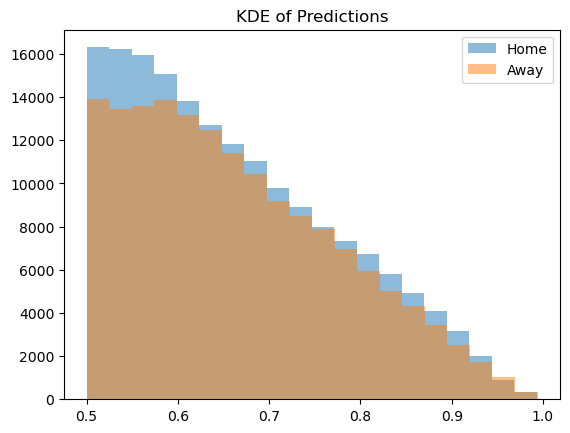

In [163]:
predictions = model.predict_proba(final_df.drop(columns=['WIN', 'GAME_ID']))

comb_df = final_df.copy()

comb_df['predictions'] = np.max(predictions, axis=1)


# Plot a KDE of the predictions
import seaborn as sns
plt.hist(comb_df[comb_df['HOME'] == 1]['predictions'], bins=20, alpha=0.5, label='Home')
plt.hist(comb_df[comb_df['HOME'] == 0]['predictions'], bins=20, alpha=0.5, label='Away')
# sns.kdeplot(comb_df[comb_df['HOME'] == 1]['predictions'], label='Home')
# sns.kdeplot(comb_df[comb_df['HOME'] == 0]['predictions'], label='Away')
plt.legend()
plt.title('KDE of Predictions')
plt.show()



In [168]:
comb_df[comb_df.GAME_ID == '2010020001']#.groupby('TEAM').sum()

,FACEOFF,HIT,GIVEAWAY,BLOCKED_SHOT,SHOT,MISSED_SHOT,GOAL,TAKEAWAY,PENALTY,TIME_REMAINING,HOME,WIN,TEAM,GAME_ID,predictions


: 

Text(0.5, 1.0, 'Predictions')

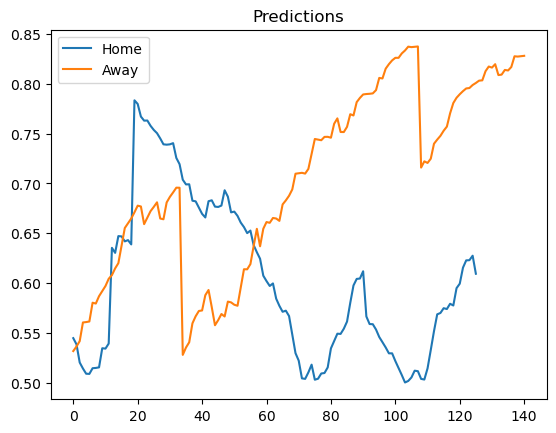

In [152]:
test = comb_df[comb_df['GAME_ID'] == 2010020001]

# Plot the predictions
plt.plot(test[test['HOME'] == 1]['predictions'], label='Home')
plt.plot(test[test['HOME'] == 0]['predictions'], label='Away')
plt.legend()
plt.title('Predictions')
